<a href="https://colab.research.google.com/github/Fatiahalzahra/Praktikum-Information-Retrival/blob/main/Praktikum1_Fatiah_Al_Zahra_01102222246.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

df = pd.read_xml('/content/drive/MyDrive/kompas-beritaPart1.xml')
df.head()

,sumber,tanggal,kategori,judul,isi,link,jumlahkata
0,kompas.com,2015/07/01,Teknologi,"Ponsel Huawei Honor 4C Dibanderol Rp 2,2 Juta","JAKARTA, KOMPAS.com Ponsel Android Huawei Hon...",http://tekno.kompas.com/read/xml/2015/07/01/18...,315
1,kompas.com,2015/07/01,Teknologi,Asosiasi: RPP E-commerce Tidak Sesuai Hasil Di...,"JAKARTA, KOMPAS.com - Sejak 2013, wacana tenta...",http://tekno.kompas.com/read/xml/2015/07/01/16...,419
2,kompas.com,2015/07/01,Teknologi,"Pemesan ""iPhone Jadi Sabun"" Karyawan Pesaing L...","JAKARTA, KOMPAS.com Danis Darusman, pelanggan ...",http://tekno.kompas.com/read/xml/2015/07/01/15...,265
3,kompas.com,2015/07/01,Teknologi,"""Autofeather Failure"", Momok bagi Pesawat Bali...",KOMPAS.com Salah satu momok yang dihadapi dala...,http://tekno.kompas.com/read/xml/2015/07/01/14...,481
4,kompas.com,2015/07/01,Teknologi,Laptop Bezel Tertipis di Dunia Masuk Indonesia,"JAKARTA, KOMPAS.com - Resmi diperkenalkan pada...",http://tekno.kompas.com/read/xml/2015/07/01/14...,227


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1502 entries, 0 to 1501
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   sumber      1502 non-null   object
 1   tanggal     1502 non-null   object
 2   kategori    1502 non-null   object
 3   judul       1502 non-null   object
 4   isi         1502 non-null   object
 5   link        1502 non-null   object
 6   jumlahkata  1502 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 82.3+ KB


In [ ]:
df.isnull().sum()

,0
sumber,0
tanggal,0
kategori,0
judul,0
isi,0
link,0
jumlahkata,0


In [ ]:
def caseFolding(text):
    text = text.lower()
    return text

contoh = "Terima kasih, Kak! Buku yang kamu berikan sangat menarik"
print(f'original: {contoh}')
print(f'case folded: {caseFolding(contoh)}')



original: Terima kasih, Kak! Buku yang kamu berikan sangat menarik
case folded: terima kasih, kak! buku yang kamu berikan sangat menarik


In [ ]:
import re

def punctuationRemoval(text):
    text = re.sub(r'[^\w\s]', '', text)
    return text

contoh = "Terimakasih Kak! Buku yang kamu berikan sangat menarik"
print(f'original: {contoh}')
print(f'punctuation removed: {punctuationRemoval(contoh)}')

original: Terimakasih Kak! Buku yang kamu berikan sangat menarik
punctuation removed: Terimakasih Kak Buku yang kamu berikan sangat menarik


In [ ]:
df['clean'] = df ['isi'].apply(caseFolding)
df['clean'] = df['clean'].apply(punctuationRemoval)
df.head()

,sumber,tanggal,kategori,judul,isi,link,jumlahkata,clean
0,kompas.com,2015/07/01,Teknologi,"Ponsel Huawei Honor 4C Dibanderol Rp 2,2 Juta","JAKARTA, KOMPAS.com Ponsel Android Huawei Hon...",http://tekno.kompas.com/read/xml/2015/07/01/18...,315,jakarta kompascom ponsel android huawei honor...
1,kompas.com,2015/07/01,Teknologi,Asosiasi: RPP E-commerce Tidak Sesuai Hasil Di...,"JAKARTA, KOMPAS.com - Sejak 2013, wacana tenta...",http://tekno.kompas.com/read/xml/2015/07/01/16...,419,jakarta kompascom sejak 2013 wacana tentang r...
2,kompas.com,2015/07/01,Teknologi,"Pemesan ""iPhone Jadi Sabun"" Karyawan Pesaing L...","JAKARTA, KOMPAS.com Danis Darusman, pelanggan ...",http://tekno.kompas.com/read/xml/2015/07/01/15...,265,jakarta kompascom danis darusman pelanggan laz...
3,kompas.com,2015/07/01,Teknologi,"""Autofeather Failure"", Momok bagi Pesawat Bali...",KOMPAS.com Salah satu momok yang dihadapi dala...,http://tekno.kompas.com/read/xml/2015/07/01/14...,481,kompascom salah satu momok yang dihadapi dalam...
4,kompas.com,2015/07/01,Teknologi,Laptop Bezel Tertipis di Dunia Masuk Indonesia,"JAKARTA, KOMPAS.com - Resmi diperkenalkan pada...",http://tekno.kompas.com/read/xml/2015/07/01/14...,227,jakarta kompascom resmi diperkenalkan pada aj...


In [ ]:
def tokenize (text):
  return text.split("  ")
contoh = "Terima kasih, Kak! Buku yang kamu berikan sangat menarik."
print(f'original: {contoh}')

clean = caseFolding(contoh)
clean = punctuationRemoval(clean)
print(f'tokenized: {tokenize(clean)}')

original: Terima kasih, Kak! Buku yang kamu berikan sangat menarik.
tokenized: ['terima kasih kak buku yang kamu berikan sangat menarik']


In [ ]:
df['token'] = df['clean'].apply(tokenize)
df.head()

,sumber,tanggal,kategori,judul,isi,link,jumlahkata,clean,token,tokens
0,kompas.com,2015/07/01,Teknologi,"Ponsel Huawei Honor 4C Dibanderol Rp 2,2 Juta","JAKARTA, KOMPAS.com Ponsel Android Huawei Hon...",http://tekno.kompas.com/read/xml/2015/07/01/18...,315,jakarta kompascom ponsel android huawei honor...,"[jakarta kompascom, ponsel android huawei hono...","[jakarta kompascom, ponsel android huawei hono..."
1,kompas.com,2015/07/01,Teknologi,Asosiasi: RPP E-commerce Tidak Sesuai Hasil Di...,"JAKARTA, KOMPAS.com - Sejak 2013, wacana tenta...",http://tekno.kompas.com/read/xml/2015/07/01/16...,419,jakarta kompascom sejak 2013 wacana tentang r...,"[jakarta kompascom, sejak 2013 wacana tentang ...","[jakarta kompascom, sejak 2013 wacana tentang ..."
2,kompas.com,2015/07/01,Teknologi,"Pemesan ""iPhone Jadi Sabun"" Karyawan Pesaing L...","JAKARTA, KOMPAS.com Danis Darusman, pelanggan ...",http://tekno.kompas.com/read/xml/2015/07/01/15...,265,jakarta kompascom danis darusman pelanggan laz...,[jakarta kompascom danis darusman pelanggan la...,[jakarta kompascom danis darusman pelanggan la...
3,kompas.com,2015/07/01,Teknologi,"""Autofeather Failure"", Momok bagi Pesawat Bali...",KOMPAS.com Salah satu momok yang dihadapi dala...,http://tekno.kompas.com/read/xml/2015/07/01/14...,481,kompascom salah satu momok yang dihadapi dalam...,[kompascom salah satu momok yang dihadapi dala...,[kompascom salah satu momok yang dihadapi dala...
4,kompas.com,2015/07/01,Teknologi,Laptop Bezel Tertipis di Dunia Masuk Indonesia,"JAKARTA, KOMPAS.com - Resmi diperkenalkan pada...",http://tekno.kompas.com/read/xml/2015/07/01/14...,227,jakarta kompascom resmi diperkenalkan pada aj...,"[jakarta kompascom, resmi diperkenalkan pada a...","[jakarta kompascom, resmi diperkenalkan pada a..."


In [ ]:
from collections import Counter

all_token = []
for tokens in df['token']:
    for token in tokens:
        all_token.append(token)

term_freq = Counter(all_token)
term_freq_df = pd.DataFrame(term_freq.items(), columns=['term', 'freq'])
term_freq_df_sorted = term_freq_df.sort_values(by='freq', ascending=False)

term_freq_df_sorted.head()

,term,freq
1169,vivacoid,277
18,,275
344,merdekacom,212
619,republikacoid jakarta,193
3433,tribunnewscom jakarta,130


In [ ]:
term_freq_df_sorted['rank'] = term_freq_df_sorted['freq'].rank(method='first', ascending=False).astype(int)
term_freq_df_sorted.head()

,term,freq,rank
1169,vivacoid,277,1
18,,275,2
344,merdekacom,212,3
619,republikacoid jakarta,193,4
3433,tribunnewscom jakarta,130,5


In [ ]:
#memanggil fungsi df sebelumnya
tf_df = term_freq_df_sorted.copy()
tf_df['Rank'] = tf_df['freq'].rank(method='first', ascending=False).astype(int)
tf_sorted_rank = tf_df.sort_values(by='Rank', ascending=True)
tf_sorted_rank.head(20)


,term,freq,rank,Rank
1169,vivacoid,277,1,1
18,,275,2,2
344,merdekacom,212,3,3
619,republikacoid jakarta,193,4,4
3433,tribunnewscom jakarta,130,5,5
0,jakarta kompascom,89,6,6
260,tempoco jakarta,35,7,7
3643,tribunnewscom,34,8,8
1471,mus,28,9,9
744,republikacoid medan,16,10,10


In [ ]:
term_freq_df_sorted['k = f * r'] = term_freq_df_sorted['freq'] * term_freq_df_sorted['rank']
term_freq_df_sorted.head(n=90)

,term,freq,rank,k = f * r
1169,vivacoid,277,1,277
18,,275,2,550
344,merdekacom,212,3,636
619,republikacoid jakarta,193,4,772
3433,tribunnewscom jakarta,130,5,650
...,...,...,...,...
1113,republikacoidnaples,2,86,172
1648,melalui iryanto muchyi,2,87,174
1043,republikacoid milan,2,88,176
2178,kemarin siang pada pukul 1200 wib atau dua men...,2,89,178


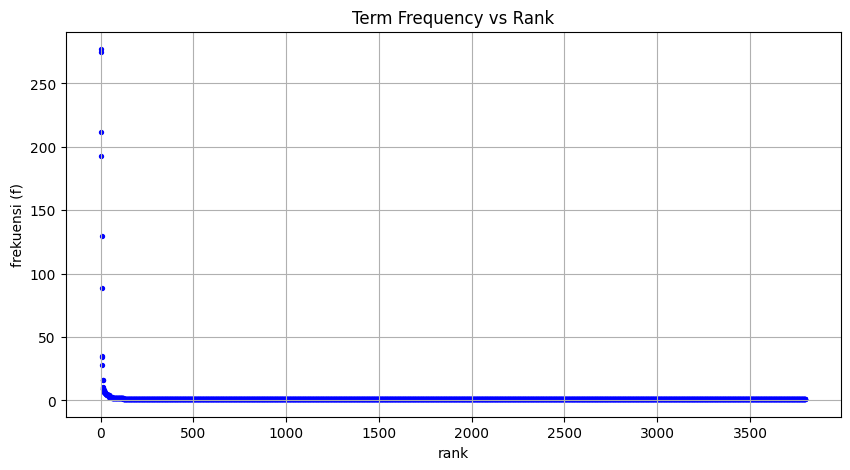

In [100]:
import matplotlib.pyplot as plt

rank = term_freq_df_sorted['rank']
freq = term_freq_df_sorted['freq']
plt.figure(figsize=(10, 5))
plt.scatter(rank, freq, color='blue', s=8)
plt.title("Term Frequency vs Rank")
plt.xlabel("rank")
plt.ylabel("frekuensi (f)")

plt.grid(True)
plt.show()